<a href="https://colab.research.google.com/github/ixora99/NewsClassify/blob/master/project05_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import gensim 
import sys


from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
'''
실행에 필요한 관련 모듈을 불러온다.
'''

!git clone https://github.com/ixora99/NewsClassify.git #깃허브에서 트레이닝 할 뉴스 자료를 불러온다



fatal: destination path 'NewsClassify' already exists and is not an empty directory.


In [0]:
class classify:
  '''
  해당되는 분류에 따라 단어들을 벡터로 바꾸는 객체를 생성하는 클래스
  '''
  def __init__(self,category,keys):
    '''
    객체를 생성 할 때 동작(단어를 벡터로 바꾼다)
    '''
    text = []
    with open("NewsClassify/resource/train.csv", encoding='utf-8') as file:
        line = file.readline()
        while line:
            if int(line[0]) == int(category):
                text.append(gensim.utils.simple_preprocess(line[2:]))
            line = file.readline()

    model = gensim.models.Word2Vec (text, size=10, window=10, min_count=2, workers=4)
    model.train(text, total_examples=len(text), epochs=100)
    self.model=model
    self.keys=keys
    return None
  
  def make_plot(self, title, a, filename=None):
    '''
    단어 분포 그래프 만드는 함수
    '''
    model=self.model
    keys=self.keys
    labels=self.keys
    
    embedding_clusters = []
    word_clusters = []
    for word in keys:
        embeddings = []
        words = []
        for similar_word, _ in model.wv.most_similar(word, topn=50):
            words.append(similar_word)
            embeddings.append(model.wv[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

        
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
    
    
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embeddings_en_2d, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha = a, label = label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
    plt.show()
    return None
  
  
  def wordlist(self):
    '''
    단어 빈도수 계산
    '''
    model=self.model
    
    wordlist = []
    count = []
    for word, obj in model.wv.vocab.items():
        wordlist.append(word)
        count.append(obj.count)
    for _ in range(100):
        idx = count.index(max(count))
        print(wordlist[idx], max(count))
        del count[idx]
        del wordlist[idx]
        
    return None
  


    

In [0]:
'''
해당 분류의 높은 빈도 단어를 찾아 지정한 키워드
'''

key_world = ['president','nuclear','people','government']
key_sports = ['game','player','olympic','team']
key_business = ['business', 'market', 'company', 'government']
key_sci = ['world','users','technology','computer']
class_world = classify(1,key_world)


In [0]:
class_world = classify(1,key_world)
class_sports=classify(2,key_sports)
class_business = classify(3,key_business)
class_sci=classify(4,key_sci)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


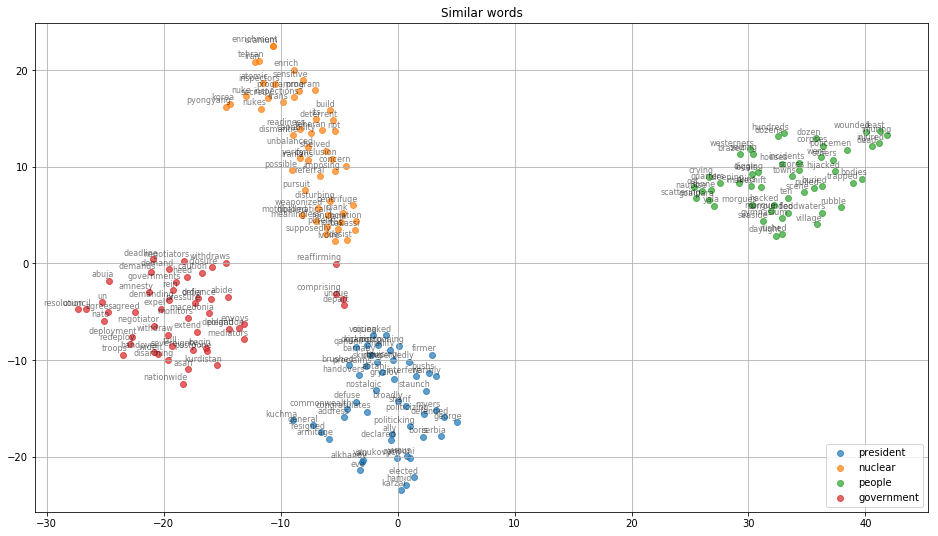

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


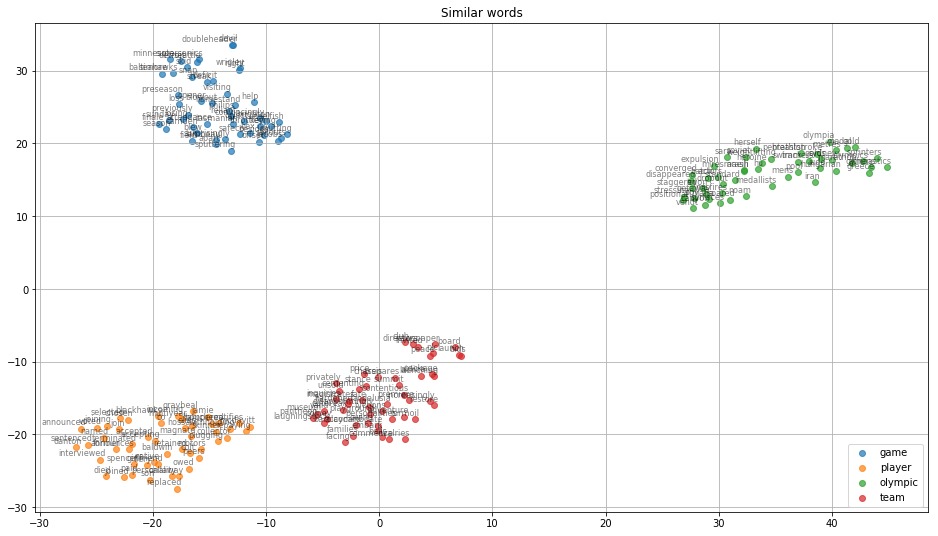

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


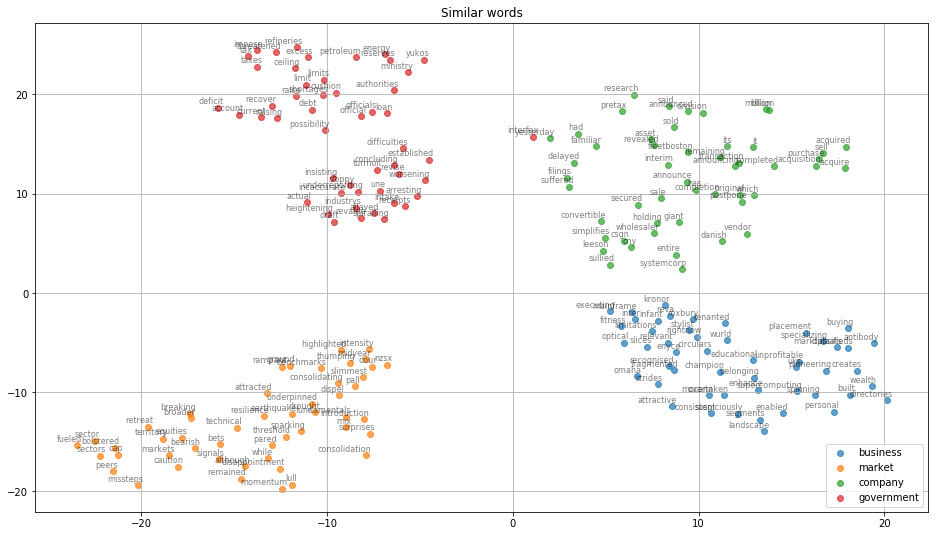

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


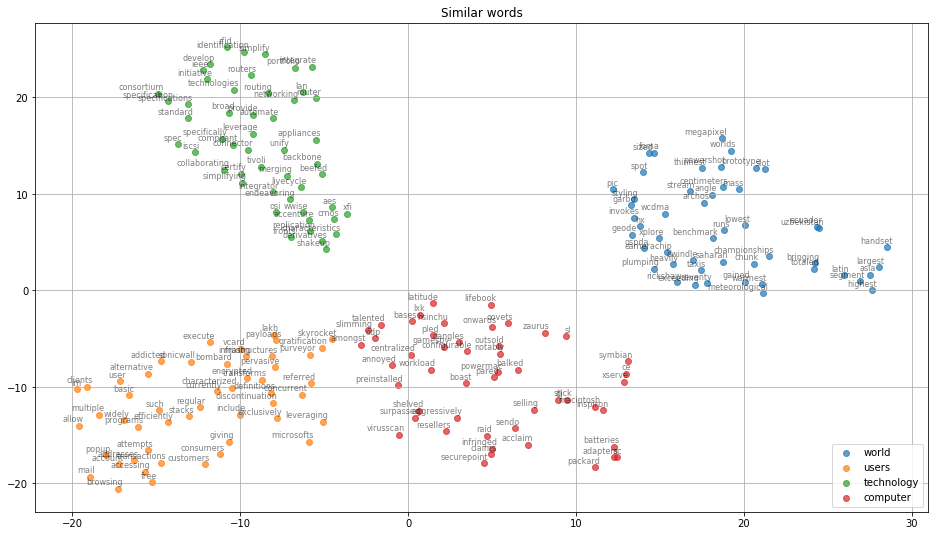

In [35]:
class_world.make_plot('Similar words',0.7,'similar_words.png')
class_sports.make_plot('Similar words',0.7,'similar_words1.png')
class_business.make_plot('Similar words',0.7,'similar_words2.png')
class_sci.make_plot('Similar words',0.7,'similar_words3.png')